In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
data=pd.read_csv('flights.csv')

In [3]:
data.head()

,flight,Time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.0,0.1,12,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,25.0,07-04-2019,10:13,R5
1,1,0.2,0.1,3,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,25.0,07-04-2019,10:13,R5
2,1,0.3,0.1,352,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,25.0,07-04-2019,10:13,R5
3,1,0.5,0.1,354,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,25.0,07-04-2019,10:13,R5
4,1,0.6,0.1,359,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,25.0,07-04-2019,10:13,R5


In [4]:
import utm

In [5]:
Z=utm.from_latlon(-79.782396,40.458047)
print(Z[1])

1142340.4095934052


In [6]:
lon=data.iloc[:,7][:-1]
Z=data.iloc[:,8][:-1]
lat=data.iloc[:,6][:-1]

In [7]:
x=[]
y=[]
z=[]
I=[]
V=[]
s=[]
t=[]
pay=[]
alti=[]
power=[]
Time=[]
for i in range(len(Z)):
#     if data.iloc[:,27][i]=='R1':
    if data.iloc[:,0][i]==1:
        Za=utm.from_latlon(lat[i],lon[i])
        x.append(Za[0])
        y.append(Za[1])
        z.append(Z[i])
        t.append((data.iloc[:,1][i]))
        I.append(data.iloc[:,5][i])
        V.append(data.iloc[:,4][i])
        s.append(data.iloc[:,22][i])
        pay.append(data.iloc[:,23][i])
        alti.append(data.iloc[:,24][i])
        power.append(np.multiply(data.iloc[:,4][i],data.iloc[:,5][i]))
        Time.append(data.iloc[:,1][i])
        print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
data.iloc[:,0][2]==1

True

In [9]:
print(len(x[:200]),len(z),len(y))

200 1339 1339


In [10]:
print(np.shape(x),np.shape(y),np.shape(z))

(1339,) (1339,) (1339,)


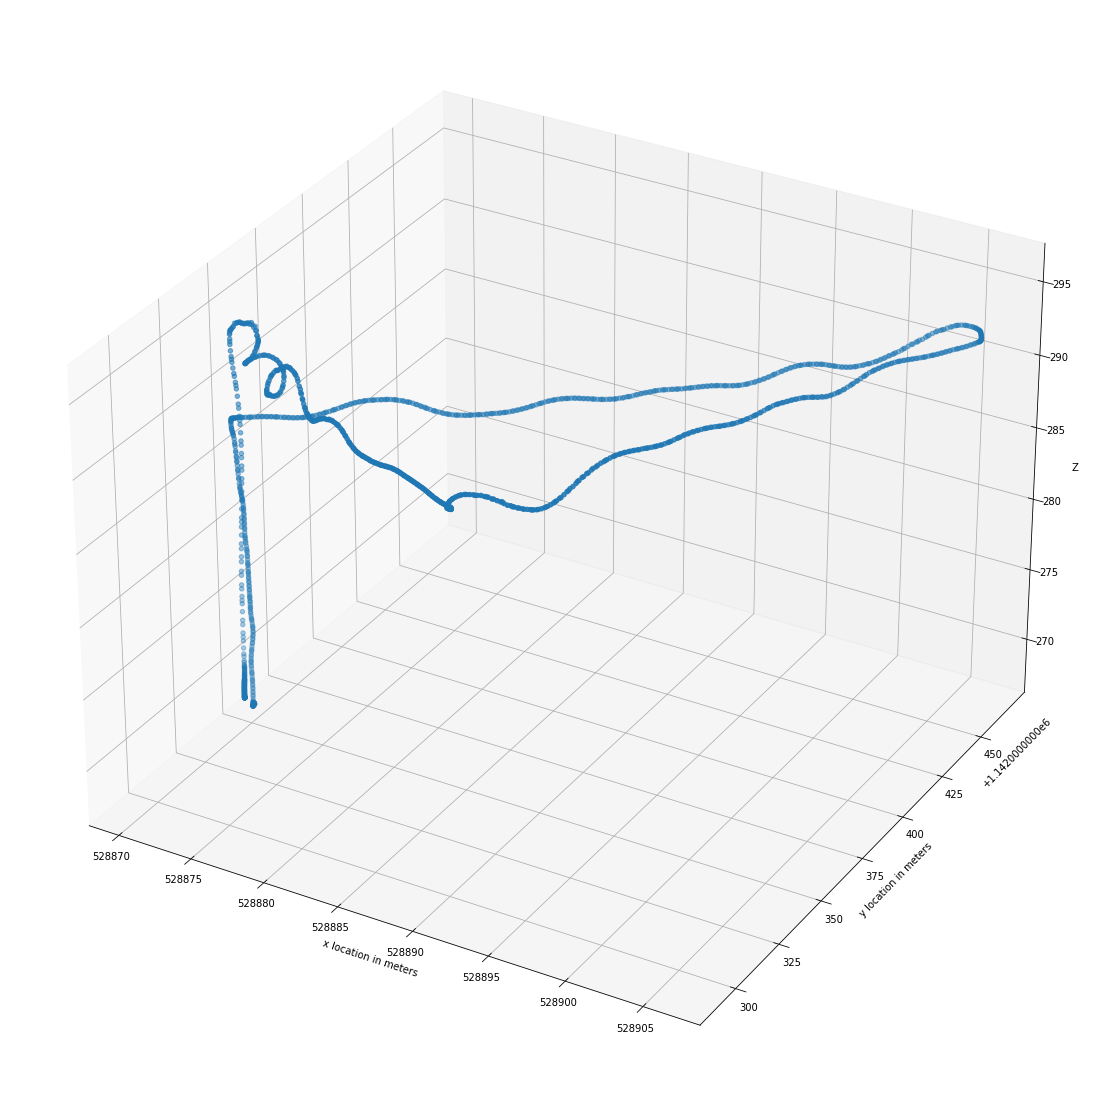

In [11]:
import matplotlib
fig = plt.figure(figsize=[20,20])
ax = plt.axes(projection='3d')
matplotlib.rcParams.update({'font.size': 15})
ax.scatter3D(x,y,z)
plt.xlabel('x location in meters')
plt.ylabel('y location in meters')
ax.set_zlabel('Z')
plt.savefig('flight_1.png')
# plt.savefig('Complete_path_flight.png')

In [12]:
#Will be defining the state of power in this flight route
Power_rating=129.96#in Wh
SOP=np.zeros((len(power),1))
sum=0
a=[]
for i in range(len(power)):
    a.append(power[i]*t[i]/3600)
#     sum=sum+power[i]*t[i]/3600
    SOP[i]=power[i]*t[i]/3600

In [13]:
#Applying for the constant scenario of FLight 1 case as discussed before.
def distance(x,y,z):
    sum=0
    for i in range(len(x)-1):
        sum=sum+np.sqrt(np.power(x[i+1]-x[i],2)+np.power(y[i+1]-y[i],2)+np.power(z[i+1]-z[i],2))
    return sum

C_distance=distance(x,y,z)-2*alti[0]# Cruise Distance
print(C_distance)

382.9113333771601


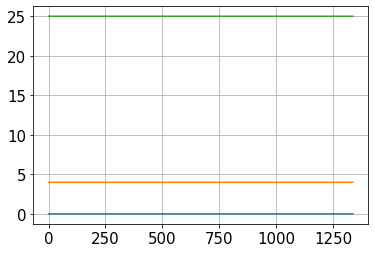

In [14]:
plt.plot(pay,label='Payload')

plt.plot(s)
plt.plot(alti)
plt.grid()

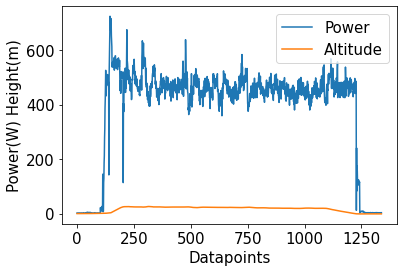

In [22]:
plt.plot(power,label='Power')
plt.xlabel('Datapoints')
plt.ylabel('Power(W) Height(m)')
plt.plot(z-z[0],label='Altitude')
plt.savefig('power_without_filter.png')
plt.legend()

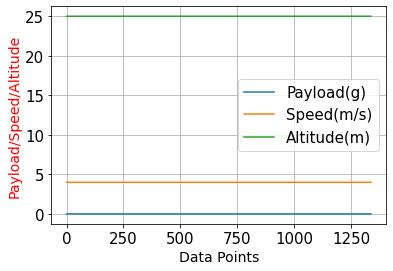

In [16]:

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(pay,label='Payload(g)')
ax.plot(s,label='Speed(m/s)')
ax.plot(alti,label='Altitude(m)')
ax.grid()
# set x-axis label
ax.set_xlabel("Data Points",fontsize=14)
# set y-axis label
ax.set_ylabel("Payload/Speed/Altitude",color="red",fontsize=14)
ax.legend()
# ax2=ax.twinx()
# ax2.set_ylabel("Power",color="black",fontsize=14)
w = savgol_filter(power, 101, 2)

# ax2.plot(w,label='Power',color="black")  # high frequency noise removed
# ax2.plot(energy,label='energy')  # high frequency noise removed
# ax2.legend(loc='lower right')
# ax2.grid()
plt.savefig('path_flight1.png')
# plt.savefig('Complete_path1.png')
# plt.savefig('Complete.png')

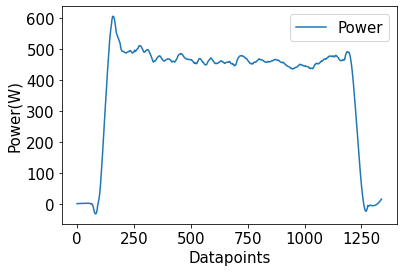

In [26]:
w = savgol_filter(power, 101, 2)
np.shape(w)
plt.plot(w,label='Power')
plt.xlabel('Datapoints')
plt.ylabel('Power(W)')
plt.legend()
plt.savefig('flight_nofilter.png')

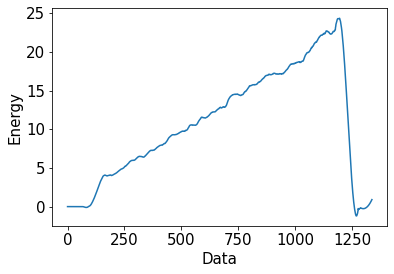

In [18]:
energy=w*Time/(60*60)
plt.plot(energy,label='energy')
plt.xlabel('Data')
plt.ylabel('Energy')
plt.savefig('Complete_energy.png')
# plt.savefig('energy.png')

In [19]:
# 99.9Whr rating in Drone battery.
Power_rating=4500 #mAh Capacity
Current=np.mean(I[250:1000])
Voltage=np.mean(V[250:1000])
print(Current,Voltage)
Time_Max=Power_rating*60*10**-3/(Current)
print(Time_Max,'minutes')

21.30673581444 21.76263293986667
12.67204898729798 minutes


In [20]:

Watt_rating=129.96 #Whr rating in Drone battery.
Current=np.mean(I[250:1000])
Voltage=np.mean(V[250:1000])
print(Current,Voltage)
Time_Max=Watt_rating*60/(Current*Voltage)
print(Time_Max,'minutes')

21.30673581444 21.76263293986667
16.816383190599723 minutes


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

data=pd.read_csv('flights.csv')

data.head()

import utm

Z=utm.from_latlon(-79.782396,40.458047)
print(Z[1])

lon=data.iloc[:,7][:-1]
Z=data.iloc[:,8][:-1]
lat=data.iloc[:,6][:-1]

x=[]
y=[]
z=[]
I=[]
V=[]
s=[]
t=[]
pay=[]
alti=[]
power=[]
Time=[]
for i in range(len(Z)):
#     if data.iloc[:,27][i]=='R1':
    if data.iloc[:,0][i]==1:
        Za=utm.from_latlon(lat[i],lon[i])
        x.append(Za[0])
        y.append(Za[1])
        z.append(Z[i])
        t.append((data.iloc[:,1][i]))
        I.append(data.iloc[:,5][i])
        V.append(data.iloc[:,4][i])
        s.append(data.iloc[:,22][i])
        pay.append(data.iloc[:,23][i])
        alti.append(data.iloc[:,24][i])
        power.append(np.multiply(data.iloc[:,4][i],data.iloc[:,5][i]))
        Time.append(data.iloc[:,1][i])
        print(i)


data.iloc[:,0][2]==1

print(len(x[:200]),len(z),len(y))

print(np.shape(x),np.shape(y),np.shape(z))

import matplotlib
fig = plt.figure(figsize=[20,20])
ax = plt.axes(projection='3d')
matplotlib.rcParams.update({'font.size': 15})
ax.scatter3D(x,y,z)
plt.xlabel('x location in meters')
plt.ylabel('y location in meters')
ax.set_zlabel('Z')
plt.savefig('flight_1.png')
# plt.savefig('Complete_path_flight.png')

#Will be defining the state of power in this flight route
Power_rating=129.96#in Wh
SOP=np.zeros((len(power),1))
sum=0
a=[]
for i in range(len(power)):
    a.append(power[i]*t[i]/3600)
#     sum=sum+power[i]*t[i]/3600
    SOP[i]=power[i]*t[i]/3600

#Applying for the constant scenario of FLight 1 case as discussed before.
def distance(x,y,z):
    sum=0
    for i in range(len(x)-1):
        sum=sum+np.sqrt(np.power(x[i+1]-x[i],2)+np.power(y[i+1]-y[i],2)+np.power(z[i+1]-z[i],2))
    return sum

C_distance=distance(x,y,z)-2*alti[0]# Cruise Distance
print(C_distance)

plt.plot(pay,label='Payload')

plt.plot(s)
plt.plot(alti)
plt.grid()

plt.plot(power,label='Power')
plt.xlabel('Datapoints')
plt.ylabel('Power(W) Height(m)')
plt.plot(z-z[0],label='Altitude')
plt.savefig('power_without_filter.png')
plt.legend()


# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(pay,label='Payload(g)')
ax.plot(s,label='Speed(m/s)')
ax.plot(alti,label='Altitude(m)')
ax.grid()
# set x-axis label
ax.set_xlabel("Data Points",fontsize=14)
# set y-axis label
ax.set_ylabel("Payload/Speed/Altitude",color="red",fontsize=14)
ax.legend()
# ax2=ax.twinx()
# ax2.set_ylabel("Power",color="black",fontsize=14)
w = savgol_filter(power, 101, 2)

# ax2.plot(w,label='Power',color="black")  # high frequency noise removed
# ax2.plot(energy,label='energy')  # high frequency noise removed
# ax2.legend(loc='lower right')
# ax2.grid()
plt.savefig('path_flight1.png')
# plt.savefig('Complete_path1.png')
# plt.savefig('Complete.png')

w = savgol_filter(power, 101, 2)
np.shape(w)
plt.plot(w,label='Power')
plt.xlabel('Datapoints')
plt.ylabel('Power(W)')
plt.legend()
plt.savefig('flight_nofilter.png')

energy=w*Time/(60*60)
plt.plot(energy,label='energy')
plt.xlabel('Data')
plt.ylabel('Energy')
plt.savefig('Complete_energy.png')
# plt.savefig('energy.png')


Watt_rating=129.96 #Whr rating in Drone battery.
Current=np.mean(I[250:1000])
Voltage=np.mean(V[250:1000])
print(Current,Voltage)
Time_Max=Watt_rating*60/(Current*Voltage)
print(Time_Max,'minutes')

